## Predict whether a mammogram mass is benign or malignant


This data contains 961 instances of masses detected in mammograms, and contains the following attributes:


   1. BI-RADS assessment: 1 to 5 (ordinal)  
   2. Age: patient's age in years (integer)
   3. Shape: mass shape: round=1 oval=2 lobular=3 irregular=4 (nominal)
   4. Margin: mass margin: circumscribed=1 microlobulated=2 obscured=3 ill-defined=4 spiculated=5 (nominal)
   5. Density: mass density high=1 iso=2 low=3 fat-containing=4 (ordinal)
   6. Severity: benign=0 or malignant=1 (binominal)

Apply several different supervised machine learning techniques to this data set. Apply:

* Decision tree
* Random forest
* KNN
* Naive Bayes
* SVM
* Logistic Regression
* Neural network using Keras.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

df= pd.read_csv('mammographic_masses.data.txt')
df.head(10)

,5,67,3,5.1,3.1,1
0,4,43,1,1,?,1
1,5,58,4,5,3,1
2,4,28,1,1,3,0
3,5,74,1,5,?,1
4,4,65,1,?,3,0
5,4,70,?,?,3,0
6,5,42,1,?,3,0
7,5,57,1,5,3,1
8,5,60,?,5,1,1
9,5,76,1,4,3,1


In [2]:
df = pd.read_csv('mammographic_masses.data.txt', na_values=['?'], names = ['BI-RADS', 'Age', 'Shape', 'Margin', 'Density', 'Severity'])
df.head()

,BI-RADS,Age,Shape,Margin,Density,Severity
0,5.0,67.0,3.0,5.0,3.0,1
1,4.0,43.0,1.0,1.0,NaN,1
2,5.0,58.0,4.0,5.0,3.0,1
3,4.0,28.0,1.0,1.0,3.0,0
4,5.0,74.0,1.0,5.0,NaN,1


In [3]:
df.shape

(961, 6)

In [4]:
df.sample(5)

,BI-RADS,Age,Shape,Margin,Density,Severity
66,4.0,49.0,1.0,1.0,3.0,0
334,4.0,64.0,4.0,4.0,3.0,0
942,5.0,58.0,3.0,4.0,3.0,1
958,4.0,64.0,4.0,5.0,3.0,0
129,5.0,40.0,4.0,5.0,3.0,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 961 entries, 0 to 960
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   BI-RADS   959 non-null    float64
 1   Age       956 non-null    float64
 2   Shape     930 non-null    float64
 3   Margin    913 non-null    float64
 4   Density   885 non-null    float64
 5   Severity  961 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 45.2 KB


In [6]:
df.describe()

,BI-RADS,Age,Shape,Margin,Density,Severity
count,959.000000,956.000000,930.000000,913.000000,885.000000,961.000000
mean,4.348279,55.487448,2.721505,2.796276,2.910734,0.463059
std,1.783031,14.480131,1.242792,1.566546,0.380444,0.498893
min,0.000000,18.000000,1.000000,1.000000,1.000000,0.000000
25%,4.000000,45.000000,2.000000,1.000000,3.000000,0.000000
50%,4.000000,57.000000,3.000000,3.000000,3.000000,0.000000
75%,5.000000,66.000000,4.000000,4.000000,3.000000,1.000000
max,55.000000,96.000000,4.000000,5.000000,4.000000,1.000000


In [7]:
df.isna().sum()

BI-RADS      2
Age          5
Shape       31
Margin      48
Density     76
Severity     0
dtype: int64

Next you'll need to convert the Pandas dataframes into numpy arrays that can be used by scikit_learn. Create an array that extracts only the feature data we want to work with (age, shape, margin, and density) and another array that contains the classes (severity). You'll also need an array of the feature name labels.

In [8]:
df.dropna(inplace=True)

In [9]:
df.isna().sum()

BI-RADS     0
Age         0
Shape       0
Margin      0
Density     0
Severity    0
dtype: int64

In [10]:
df.shape

(830, 6)

In [11]:
df.describe()

,BI-RADS,Age,Shape,Margin,Density,Severity
count,830.000000,830.000000,830.000000,830.000000,830.000000,830.000000
mean,4.393976,55.781928,2.781928,2.813253,2.915663,0.485542
std,1.888371,14.671782,1.242361,1.567175,0.350936,0.500092
min,0.000000,18.000000,1.000000,1.000000,1.000000,0.000000
25%,4.000000,46.000000,2.000000,1.000000,3.000000,0.000000
50%,4.000000,57.000000,3.000000,3.000000,3.000000,0.000000
75%,5.000000,66.000000,4.000000,4.000000,3.000000,1.000000
max,55.000000,96.000000,4.000000,5.000000,4.000000,1.000000


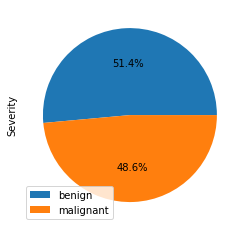

In [12]:
df['Severity'].value_counts().plot.pie(labels=['',''],autopct='%1.1f%%')
labels=['benign','malignant']
plt.legend(labels,loc=3)

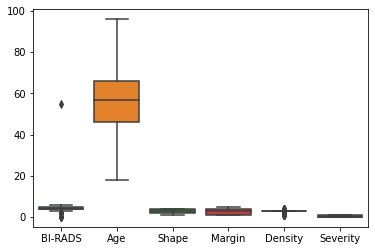

In [13]:
sns.boxplot(data=df);

In [14]:
df= df[df['BI-RADS']<6]

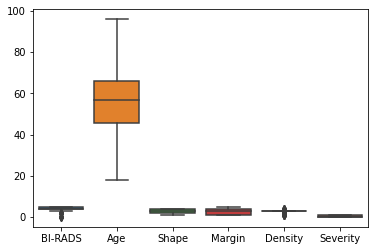

In [15]:
sns.boxplot(data=df);

In [16]:
df.groupby('Severity').Age.agg(['mean','median'])

,mean,median
Severity,,
0,49.284706,50.0
1,62.683544,64.0


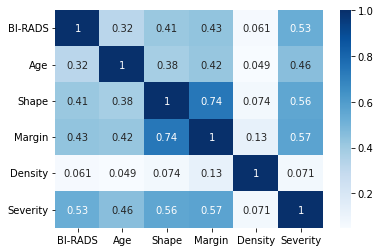

In [17]:
c= df.corr()
sns.heatmap(c,cmap='Blues',annot=True);

In [18]:
features = list(df[['Age','Shape','Margin','Density']])
features

['Age', 'Shape', 'Margin', 'Density']

In [19]:
y= df['Severity']
x= df[features]

In [20]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest= train_test_split(x,y,test_size=0.25,random_state=2)

In [21]:
print("Train Size: ", len(xtrain))
print("Test Size:  ", len(xtest))

Train Size:  615
Test Size:   205


## Decision Trees


In [22]:
from sklearn import tree
clf = tree.DecisionTreeClassifier(random_state=1)
clf = clf.fit(xtrain,ytrain)

In [23]:
y_pred = clf.predict(xtest)
lr_1=clf.score(xtest, ytest)
print('Accuracy= {:.3f}'.format(clf.score(xtest,ytest)))

Accuracy= 0.732


In [24]:
from sklearn.metrics import classification_report
target_names = ['0', '1']
print(classification_report(ytest, y_pred, target_names=target_names))

              precision    recall  f1-score   support

           0       0.70      0.80      0.75       102
           1       0.77      0.66      0.71       103

    accuracy                           0.73       205
   macro avg       0.74      0.73      0.73       205
weighted avg       0.74      0.73      0.73       205



## Random Forest

In [25]:
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier(n_estimators=10)
clf= clf.fit(xtrain , ytrain)
clf

RandomForestClassifier(n_estimators=10)

In [26]:
y_pred = clf.predict(xtest)
clf_1=clf.score(xtest, ytest)
print('Accuracy= {:.3f}'.format(clf.score(xtest, ytest)))

Accuracy= 0.746


In [27]:
from sklearn.metrics import classification_report
target_names = ['0', '1']
print(classification_report(ytest, y_pred, target_names=target_names))

              precision    recall  f1-score   support

           0       0.73      0.77      0.75       102
           1       0.76      0.72      0.74       103

    accuracy                           0.75       205
   macro avg       0.75      0.75      0.75       205
weighted avg       0.75      0.75      0.75       205



## SVM

In [28]:
from sklearn import svm
clf = svm.SVC(kernel='linear')
clf.fit(xtrain, ytrain)
clf

SVC(kernel='linear')

In [29]:
y_pred = clf.predict(xtest)
clf_1=clf.score(xtest, ytest)
print('Accuracy= {:.3f}'.format(clf.score(xtest, ytest)))

Accuracy= 0.805


In [30]:
from sklearn.metrics import classification_report
target_names = ['0', '1']
print(classification_report(ytest, y_pred, target_names=target_names))

              precision    recall  f1-score   support

           0       0.84      0.75      0.79       102
           1       0.78      0.85      0.81       103

    accuracy                           0.80       205
   macro avg       0.81      0.80      0.80       205
weighted avg       0.81      0.80      0.80       205



## KNN

In [31]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(xtrain, ytrain)
knn

KNeighborsClassifier()

In [32]:
y_pred = knn.predict(xtest)
knn_1=knn.score(xtest, ytest)
print('Accuracy= {:.3f}'.format(knn.score(xtest, ytest)))

Accuracy= 0.776


In [33]:
from sklearn.metrics import classification_report
target_names = ['0', '1']
print(classification_report(ytest, y_pred, target_names=target_names))

              precision    recall  f1-score   support

           0       0.79      0.75      0.77       102
           1       0.77      0.80      0.78       103

    accuracy                           0.78       205
   macro avg       0.78      0.78      0.78       205
weighted avg       0.78      0.78      0.78       205



## Naive Bayes

In [34]:
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()
nb= nb.fit(xtrain , ytrain)
nb

GaussianNB()

In [35]:
y_pred = nb.predict(xtest)
nb_1=nb.score(xtest, ytest)
print('Accuracy= {:.3f}'.format(nb.score(xtest, ytest)))

Accuracy= 0.795


In [36]:
from sklearn.metrics import classification_report
target_names = ['0', '1']
print(classification_report(ytest, y_pred, target_names=target_names))

              precision    recall  f1-score   support

           0       0.83      0.75      0.78       102
           1       0.77      0.84      0.81       103

    accuracy                           0.80       205
   macro avg       0.80      0.79      0.79       205
weighted avg       0.80      0.80      0.79       205



## Revisiting SVM

In [37]:
clf = svm.SVC(kernel='rbf')
clf.fit(xtrain,ytrain)
clf

SVC()

In [38]:
y_pred= clf.predict(xtest)
clf_1=clf.score(xtest,ytest)
print('Accuracy= {:.3f}'.format(clf.score(xtest,ytest)))

Accuracy= 0.746


In [39]:
from sklearn.metrics import classification_report
target_names = ['0', '1']
print(classification_report(ytest, y_pred, target_names=target_names))

              precision    recall  f1-score   support

           0       0.76      0.73      0.74       102
           1       0.74      0.77      0.75       103

    accuracy                           0.75       205
   macro avg       0.75      0.75      0.75       205
weighted avg       0.75      0.75      0.75       205



## Logistic Regression

In [40]:
from sklearn.linear_model import LogisticRegression
LR= LogisticRegression(C = 1)
LR= LR.fit(xtrain , ytrain)
LR

LogisticRegression(C=1)

In [41]:
y_pred = LR.predict(xtest)
lr_1=LR.score(xtest, ytest)
print('Accuracy= {:.3f}'.format(LR.score(xtest, ytest)))

Accuracy= 0.795


In [42]:
from sklearn.metrics import classification_report
target_names = ['0', '1']
print(classification_report(ytest, y_pred, target_names=target_names))

              precision    recall  f1-score   support

           0       0.80      0.78      0.79       102
           1       0.79      0.81      0.80       103

    accuracy                           0.80       205
   macro avg       0.80      0.80      0.80       205
weighted avg       0.80      0.80      0.80       205



## Neural Network

In [43]:
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential

def create_model():
    model = Sequential()
    model.add(Dense(6, input_dim=4, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [46]:
from sklearn.model_selection import cross_val_score
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

estimator = KerasClassifier(build_fn=create_model, epochs=100, verbose=0)
cv_scores = cross_val_score(estimator, x, y, cv=10)
cv_scores.mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  after removing the cwd from sys.path.


0.7829268336296081